# Полносвязные нейронные сети

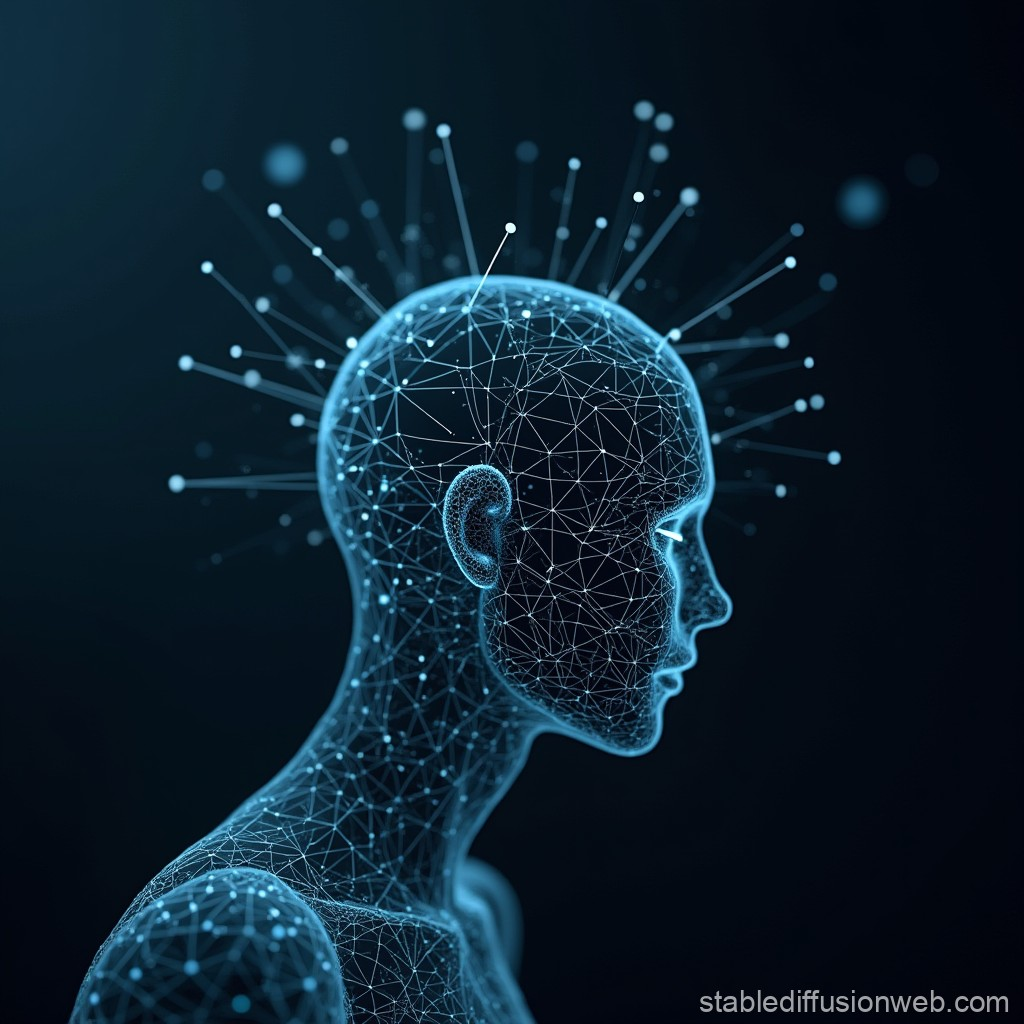

## Что мы изучим на этом занятии?

* Что такое нейросеть?
* Из чего состоит нейросеть?
* Функции активации
* Как обучется нейросеть?
* Визуализация процесса обучения нейросети
* Преимущества и недостатки нейросетей
* Как создать нейросеть?

## Что такое нейросеть?

Нейронная сеть — это математическая модель, имитирующая работу человеческого мозга. Она состоит из множества простых элементов, называемых нейронами, которые связаны между собой и способны передавать сигналы друг другу. Нейросети обладают рядом ключевых особенностей, включая параллельную обработку данных, нелинейность, масштабируемость, обобщающую способность, гибкость и универсальность для различных задач.

## Из чего состоит нейросеть?

Прежде, чем мы начнем объяснение из чего состоит нейросеть, давайте определим, что

* $x = (x_1, x_2, \dots, x_n)$ — входной вектор (например, пиксели изображения);
* $y$ — истинное значение, которое мы хотим предсказать (например, класс для задачи классификации);
* $L$ — количество слоев нейросети.

Нейросети состоят из слоев **нейронов**. Слои бывают нескольких типов:

* *Входной слой* $a^{(0)}$ принимает входные данные (например, пиксели изображения или слова в тексте). Обратите внимание, что значения входного слоя равны входному вектору, то есть $ a^{(0)} = x $.

* *Скрытый слой* $a^{(l)}$ обрабатывает данные. Чем больше скрытых слоев, тем более сложные зависимости может уловить сеть.

* *Выходной слой* $a^{(L)}$генерирует окончательный результат (например, предсказания класса для задачи классификации).

Нейросети получают признаки на входном слое и затем поэтапно обрабатывают эти признаки в скрытых слоях, выдавая ответ на выходном слое. Таким образом, нейросеть работает последовательно, пропуская входные признаки через все свои слои.

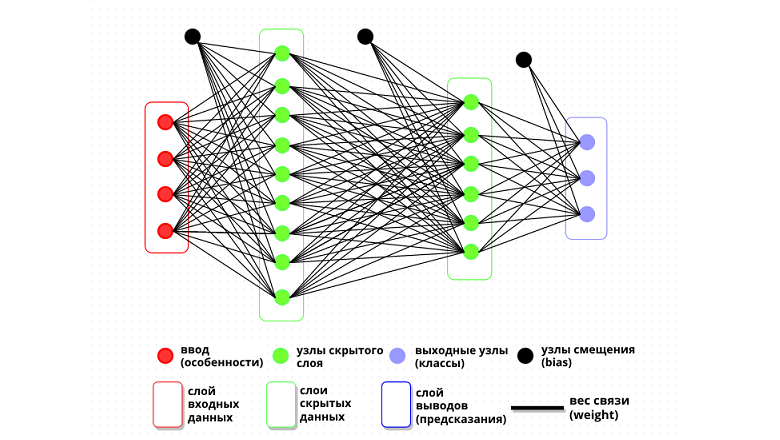

[Источник](https://habr.com/ru/articles/805209/)

Скрытые слои состоят из нейронов, каждые из которых получают числа со всех нейронов предыдующего слоя. Визуально работу каждого нейрона мы можем визуализировать таким образом:

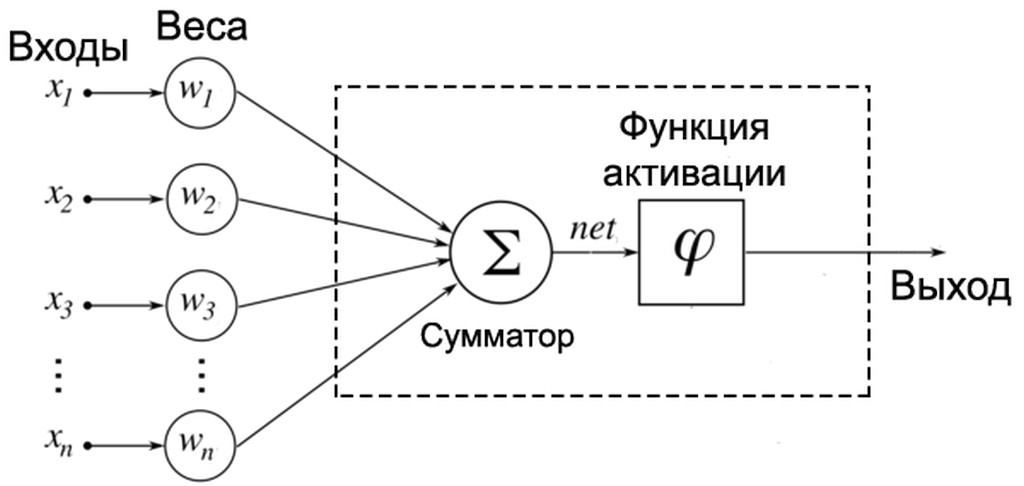

[Источник](https://trends.rbc.ru/trends/industry/641157be9a7947d3401fa3e8)

Каждый слой нейросети можно описать с помощью матрицы **весов** (или параметров), вектора **смещений** и **функции активации**. То есть, для каждого слоя $l$ существует:

* $W^{(l)}$ — матрица весов, соединяющая слой $l-1$ с слоем $l$.
* $b^{(l)}$ — вектор смещений (bias), который добавляется к выходу слоя.

Если формулировать работу нейросети математически, то на каждом слое нейросети будет выполняться операция:

$$
z^{(l)} = W^{(l)} a^{(l-1)} + b^{(l)},
$$
где:
- $z^{(l)}$ — линейная комбинация входов для слоя $l$.
- $a^{(l-1)}$ — активации предыдущего слоя. На первом слое $a^{(0)} = x$.



Затем к $z^{(l)}$ применяется **функция активации** $f$, чтобы получить активации для текущего слоя:

$$ a^{(l)} = f(z^{(l)}) $$

На последнем слое $L$ получаем итоговое предсказание:

$$ \hat{y} = a^{(L)} $$

Числа на последнем слое могут быть либо *вероятностями/логитами* (при задаче классификации), либо *вещественными числами* (при задаче регрессии).

## Функции активации

Функции активации в нейросетях определяют, как нейрон будет "активироваться", то есть, как преобразовать входной сигнал для передачи его на следующий слой. Они помогают нейросети моделировать нелинейные зависимости, что позволяет решать более сложные задачи, такие как распознавание образов, классификация текста и другие.

Далее, мы перечислим некоторые популярные функции активации, которые используются в нейросетях.

### Сигмоидная функция (Sigmoid)

In [ ]:
import numpy as np
import plotly.graph_objects as go

# Данные для сигмоидной функции
x = np.linspace(-10, 10, 200)
sigmoid = 1 / (1 + np.exp(-x))

# Создание графика
fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=sigmoid, mode='lines', name='Sigmoid Function', line=dict(color='royalblue')))

# Настройка отображения графика
fig.update_layout(title="Sigmoid Activation Function",
                  xaxis_title="x",
                  yaxis_title="σ(x) = 1 / (1 + exp(-x))",
                  yaxis=dict(range=[-0.1, 1.1]),
                  template="plotly_white")

fig.show()


$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$
- **Диапазон**: (0, 1)
- **Особенности**: Сигмоидная функция сжимает входное значение в диапазон от 0 до 1, поэтому она часто использовалась в выходном слое для задач бинарной классификации.
- **Недостатки**: Входит в "плато", когда значения становятся слишком большими или слишком маленькими, то есть градиенты стремятся к нулю, что замедляет обучение (проблема "затухающих градиентов").

### Гиперболический тангенс (Tanh)

In [ ]:
import numpy as np
import plotly.graph_objects as go

# Данные для функции гиперболического тангенса
x = np.linspace(-10, 10, 200)
tanh = np.tanh(x)

# Создание графика
fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=tanh, mode='lines', name='Tanh Function', line=dict(color='crimson')))

# Настройка отображения графика
fig.update_layout(title="Hyperbolic Tangent Activation Function",
                  xaxis_title="x",
                  yaxis_title="tanh(x)",
                  yaxis=dict(range=[-1.1, 1.1]),
                  template="plotly_white")

fig.show()


$$
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$
- **Диапазон**: (-1, 1)
- **Особенности**: Tanh — это масштабированная версия сигмоида, она сжимает значения в диапазон от -1 до 1, что помогает нейронам сосредотачиваться на положительных или отрицательных значениях.
- **Недостатки**: Также подвержена затуханию градиентов для больших значений $|x|$, как и сигмоида.

### Rectified Linear Unit

In [ ]:
import numpy as np
import plotly.graph_objects as go

# Данные для функции ReLU
x = np.linspace(-10, 10, 200)
relu = np.maximum(0, x)

# Создание графика
fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=relu, mode='lines', name='ReLU Function', line=dict(color='green')))

# Настройка отображения графика
fig.update_layout(
    title="ReLU Activation Function",
    xaxis_title="x",
    yaxis_title="ReLU(x)",
    template="plotly_white"
)

fig.show()


$$
f(x) = \max(0, x)
$$
- **Диапазон**: [0, ∞)
- **Особенности**: ReLU возвращает ноль для всех отрицательных значений и линейно увеличивается для положительных, что делает её вычислительно простой и эффективной. Она часто используется в скрытых слоях глубоких нейросетей.
- **Недостатки**: Проблема "мертвых" нейронов, когда веса становятся такими, что выходной сигнал всегда равен нулю (например, если $x < 0$). Эти нейроны могут "выйти из строя" и больше не участвовать в обучении.

### Softmax

$$
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^K e^{x_j}}
$$
- **Диапазон**: (0, 1), сумма значений равна 1
- **Особенности**: Обычно используется в выходном слое для задач многоклассовой классификации, так как возвращает вероятность каждого класса.
- **Недостатки**: Используется только в выходных слоях и не подходит для скрытых слоев.

## Как обучается нейросеть?

Процесс обучения нейросети можно описать несколькими этапами:

1. Инициализация параметров модели
2. Прямое распространение (англ. Forward Pass/Propogation)
3. Вычисление потерь (или ошибки)
4. Обратное распространение ошибки (англ. Backpropogation)
5. Повторить всё, начиная с этапа 2

Теперь, давайте более подробно поговорим о каждом этапе.

### Инициализация параметров модели

Перед началом обучения нейросети все параметры модели, в том числе веса и смещения, инициализируются случайными числами.

### Прямое распространение

Входные данные проходят через слои нейросети, и на каждом слое происходит вычисление по формуле:

$$ a^{(l)} = f(W^{(l)} a^{(l-1)} + b^{(l)}) $$

где

* $a^{(l-1)}$ — активации предыдущего слоя
* $W^{(l)}$ — матрица весов, соединяющая слой $l-1$ с слоем $l$
* $b^{(l)}$ — вектор смещений (bias), который добавляется к выходу слоя
* $f$ - функция активации

### Вычисление потерь (ошибки)

Сравнивается предсказанный выход с истинным значением, и вычисляется ошибка с использованием функции потерь.

Функция потерь $L(y, \hat{y})$ измеряет, насколько предсказанное значение $\hat{y}$ отличается от истинного значения $y$. Например, в задаче регрессии можно использовать среднеквадратичную ошибку:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2,
$$

где $n$ — количество примеров.

Для задачи классификации используются другие функции потерь, такие как *кросс-энтропия*:
$$
L(y, \hat{y}) = -\sum_{i=1}^K y_i \log(\hat{y}_i),
$$
где $K$ — количество классов, $y_i$ — истинная метка, а $\hat{y}_i$ — предсказанная вероятность для класса $i$.

### Обратное распространение ошибки

Чтобы обновить веса и минимизировать ошибку, используется метод градиентного спуска. Градиенты функции потерь $L$ вычисляются для каждого веса $W^{(l)}$ и смещения $b^{(l)}$:
$$
W^{(l)} \leftarrow W^{(l)} - \eta \frac{\partial L}{\partial W^{(l)}},
$$
$$
b^{(l)} \leftarrow b^{(l)} - \eta \frac{\partial L}{\partial b^{(l)}},
$$
где $\eta$ — скорость обучения, определяющая размер шага для обновления весов.

## Визуализация процесса обучения нейросети

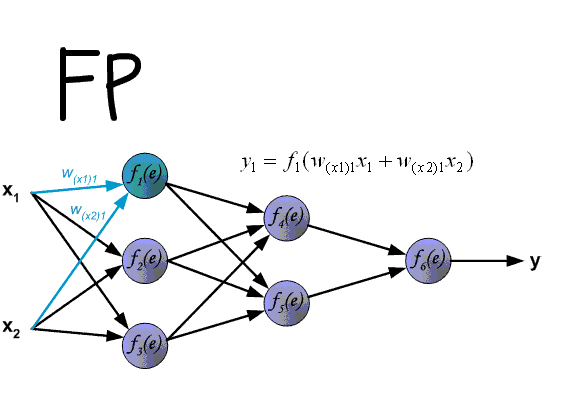

[Источник](https://ru.stackoverflow.com/questions/740510/%D0%9A%D0%B0%D0%BA-%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%D0%B5%D1%82-%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC-%D0%BE%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%BE%D0%B3%D0%BE-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%BE%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%B5%D0%BD%D0%B8%D1%8F-%D0%BE%D1%88%D0%B8%D0%B1%D0%BA%D0%B8)

## Преимущества и недостатки нейросетей

### Преимущества нейросетей



1. **Обработка сложных и нелинейных зависимостей**  
   Нейросети способны моделировать сложные, нелинейные зависимости в данных благодаря использованию многослойной архитектуры и функций активации. Это позволяет им решать задачи, которые трудно решить традиционными методами.

2. **Автоматическое извлечение иерархических признаков**  
   В отличие от классических методов машинного обучения, где требуется вручную выбирать признаки, глубокие нейросети способны автоматически извлекать полезные признаки, выстраивающиеся в иерархию, что упрощает обработку сырых данных, таких как изображения и текст.

3. **Высокая точность на больших данных**  
   Нейросети демонстрируют высокую точность на больших объемах данных. Чем больше данных и слоев, тем лучше нейросети могут обучаться, достигая результатов, сопоставимых с человеческим уровнем.

4. **Гибкость и универсальность**  
   Нейросети можно применять к различным типам данных и задачам: классификации, регрессии, кластеризации, генерации новых данных, выявлению аномалий и многим другим. Они могут работать с изображениями, текстом, аудио и сигналами.

5. **Возможность применения предобученных моделей**  
   Существует большое количество предобученных моделей, которые можно дообучить под конкретную задачу, что значительно экономит ресурсы и время, особенно если объема данных недостаточно для обучения "с нуля".

### Недостатки нейросетей



1. **Требовательность к данным и ресурсам**  
   Нейросети требуют большого объема данных для обучения и значительных вычислительных ресурсов, особенно когда речь идет о глубоких сетях. В отсутствие большого количества данных или мощного оборудования обучение может быть неэффективным.

2. **Время обучения**  
   Обучение нейросети, особенно глубокой, может занимать много времени, от нескольких часов до нескольких недель, в зависимости от сложности задачи, объема данных и используемых ресурсов.

3. **Риск переобучения**  
   Нейросети склонны к переобучению, особенно при наличии ограниченного количества данных или при чрезмерно сложной архитектуре. Это делает необходимым использование регуляризации и других методов, чтобы избежать проблемы.

4. **Черный ящик**  
   Нейросети трудны для интерпретации. Это затрудняет понимание того, почему сеть сделала то или иное предсказание, что может быть критично в областях, требующих объяснимости, таких как медицина, финансы или право.

5. **Чувствительность к качеству данных**  
   Нейросети крайне чувствительны к шуму и выбросам в данных. Они могут легко подстроиться под шум, что снизит общую точность и устойчивость модели.

## Как создать нейросеть?

### PyTorch

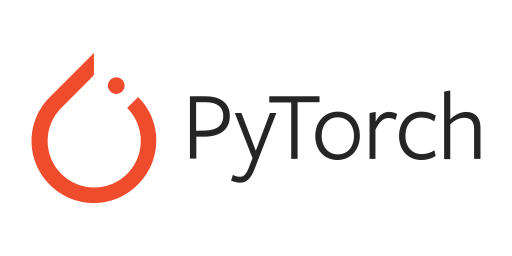

[Источник](https://medium.com/@weidagang/learning-pytorch-the-basic-program-structure-ed5723118b67)

PyTorch — это открытая библиотека машинного обучения, широко используемая в академических исследованиях и промышленности. Она предоставляет инструментарий для создания и обучения нейронных сетей. Одной из особенностей этой библиотеки является то, что она позволяет выполнять вычисления на графических ускорителях (GPU), что часто является критически важным для обучения нейросетей за приемлемое время.

Мы будем использовать эту библиотеку для создания нейросетей, так как она является самой популярной среди остальных библиотек и активно поддерживается.

### Установка PyTorch

Если вы работаете в Google Colab, то вам не требуется устанавливать PyTorch, так как он установлен по умолчанию.

Если вы работаете со своего компьютера, то вам необходимо сначала установить [anaconda](https://docs.anaconda.com/anaconda/install/), затем установить [pytorch](https://pytorch.org/) согласно инструкциям.

### Основные понятия в PyTorch

#### Device

Device в PyTorch используется для указания, на каком устройстве будут выполняться вычисления. Это может быть центральный процессор (CPU) или графический процессор (GPU). Например, если вы хотите использовать GPU для ускорения обучения, вы можете задать `device = torch.device('cuda')`. Если GPU недоступен, можно использовать CPU: `device = torch.device('cpu')`. Это позволяет вам легко переключаться между устройствами в вашем коде.

```python
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
```

#### Dataset

Dataset представляет собой структуру данных, которая содержит входные данные и соответствующие метки (целевые значения). В PyTorch вы можете создать кастомный датасет, унаследовав от класса `torch.utils.data.Dataset`, определив методы `__len__` и `__getitem__`. Это позволяет PyTorch загружать данные по отдельности, что удобно для работы с большими объемами данных.

```python
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

# Пример кастомного класса Dataset
class CustomDataset(Dataset):
    def __init__(self, data, labels):
        """
        Инициализация датасета.
        
        :param data: numpy массив или тензор с входными данными
        :param labels: numpy массив или тензор с метками
        """
        self.data = data
        self.labels = labels

    def __len__(self):
        """
        Возвращает длину датасета (количество образцов).
        """
        return len(self.labels)

    def __getitem__(self, idx):
        """
        Получает образец и его метку по индексу.
        
        :param idx: Индекс образца
        :return: Кортеж (входные данные, метка)
        """
        sample = self.data[idx]
        label = self.labels[idx]
        return torch.FloatTensor(sample), torch.LongTensor([label])
```

#### Batch, DataLoader и Epoch

Batch (пакет) — это группа данных, которая обрабатывается одновременно в одной итерации обучения. Вместо того чтобы передавать один пример за раз, модель получает пакет, что увеличивает эффективность вычислений и стабильность градиентного спуска. Размер пакета (batch size) — это количество примеров, которые вы обрабатываете за один шаг обучения. Например, если размер пакета равен 32, то на каждом шаге обучения модель будет использовать 32 примера.


`DataLoader` — это класс в PyTorch, который упрощает загрузку данных из вашего датасета. Он автоматически создает итераторы, которые могут возвращать данные в виде батчей. `DataLoader` также поддерживает возможность перемешивания данных (`shuffle`) и параллельной загрузки через многопоточность (`num_workers`). Это делает процесс загрузки данных более эффективным и простым в использовании.

```python
from torch.utils.data import DataLoader

# Функция collate_batch
def collate_batch(batch):
    """
    Объединяет данные в батчи.
    
    :param batch: Список кортежей (входные данные, метка)
    :return: Объединенные данные и метки
    """
    data, labels = zip(*batch)  # Разделяем входные данные и метки
    return torch.stack(data), torch.tensor(labels)

# Создание экземпляра CustomDataset
dataset = CustomDataset()

# Создание DataLoader
data_loader = DataLoader(dataset, batch_size=16, shuffle=True, collate_fn=collate_batch)
```

Epoch — это один полный проход по всему обучающему набору данных. Если вы обучаете модель, то за одну эпоху модель видит все доступные обучающие данные один раз. Обычно модель обучается на нескольких эпохах, чтобы улучшить ее производительность и минимизировать ошибку на тестовом наборе.

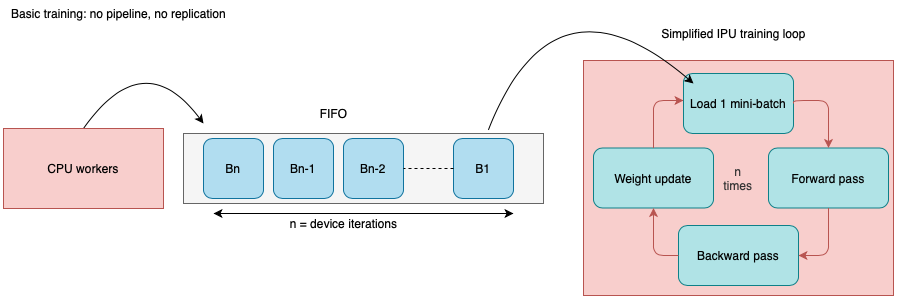

[Источник](https://docs.graphcore.ai/projects/tutorials/en/latest/pytorch/efficient_data_loading/README.html)

#### nn.Module

`nn.Module` — это базовый класс для всех нейронных сетей в PyTorch. Если вы создаете свою собственную модель, вам нужно унаследоваться от этого класса и реализовать метод `forward`, который определяет, как входные данные проходят через сеть. Этот класс также предоставляет встроенные методы для управления параметрами модели и выполнения операций, таких как сохранение и загрузка модели.

```python
import torch
import torch.nn as nn

class SimpleFeedForwardNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        """
        Инициализация простой полносвязной нейронной сети.
        
        :param input_size: Число входных признаков
        :param hidden_size: Число нейронов в скрытом слое
        :param output_size: Число выходных классов
        """
        super(SimpleFeedForwardNN, self).__init__()
        
        # Определяем слои сети
        self.fc1 = nn.Linear(input_size, hidden_size)  # Первый слой (вход -> скрытый)
        self.relu = nn.ReLU()                          # Функция активации ReLU
        self.fc2 = nn.Linear(hidden_size, output_size)  # Второй слой (скрытый -> выход)

    def forward(self, x):
        """
        Прямое распространение входных данных через сеть.
        
        :param x: Входные данные
        :return: Выходные данные
        """
        x = self.fc1(x)          # Применяем первый слой
        x = self.relu(x)        # Применяем функцию активации
        x = self.fc2(x)          # Применяем второй слой
        return x
```

### Пример создания нейросети

В качестве задачи мы возьмем классификацию текста из датасета `20newsgroups`. Для простоты задачи мы возьмем уже векторизованную версию датасета. В итоге мы создадим нейросеть на PyTorch и обучим её классифицировать текст.

Для начала загрузим необходимые модули:

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
from tqdm import tqdm

Создадим девайс, с которым будем работать:

In [ ]:
# Устанавливаем устройство для вычислений: GPU, если доступно, иначе CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Загрузим данные и разделим на обучающую и тестовую выборки:

In [ ]:
# Загрузка данных из 20 Newsgroups в векторизованном формате
data = fetch_20newsgroups_vectorized(subset='all')
X = data.data  # Входные данные (признаки)
y = data.target  # Целевые метки (классы)

# Разделение данных на обучающую и тестовую выборки (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Создадим `CustomDataset`, чтобы мы могли загружать данные батчами с помощью DataLoader:

In [ ]:
# Создание пользовательского датасета
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X  # Входные данные
        self.y = y  # Метки

    def __len__(self):
        return self.X.shape[0]  # Возвращаем количество образцов

    def __getitem__(self, idx):
        return self.X[idx].toarray(), self.y[idx]  # Возвращаем входные данные и метку по индексу

# Создание экземпляров пользовательского датасета для обучения и тестирования
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

Создадим DataLoader и определим функцию `collate_batch`

In [ ]:
# Функция collate_batch для объединения данных в батчи
def collate_batch(batch):
    X_list, y_list = zip(*batch)  # Разделяем входные данные и метки
    X_batch = np.vstack(X_list)  # Объединяем входные данные в один массив
    y_batch = np.array(y_list)  # Преобразуем метки в массив
    return torch.tensor(X_batch, dtype=torch.float32), torch.tensor(y_batch, dtype=torch.long)  # Преобразуем в тензоры

# Создание DataLoader для обучающей и тестовой выборок
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True, collate_fn=collate_batch)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False, collate_fn=collate_batch)

Создадим класс для модели `SimpleNN`, в котором распишем из чего будет состоять нейросеть и как она будет работать. Создать полносвязный слой можно с помощью [`nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html):

In [ ]:
# Определение нейронной сети
class SimpleNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNN, self).__init__()  # Инициализация базового класса nn.Module
        self.fc1 = nn.Linear(input_size, 128)  # Первый полносвязный слой
        self.fc2 = nn.Linear(128, 64)  # Второй полносвязный слой
        self.fc3 = nn.Linear(64, output_size)  # Выходной слой
        self.relu = nn.ReLU()  # Функция активации ReLU

    def forward(self, x):
        x = self.relu(self.fc1(x))  # Применяем первый слой и ReLU
        x = self.relu(self.fc2(x))  # Применяем второй слой и ReLU
        x = self.fc3(x)  # Применяем выходной слой
        return x  # Возвращаем выходные данные

Создадим модель, функцию потерь и оптимизатор:

In [ ]:
# Инициализация модели, функции потерь и оптимизатора
input_size = X_train.shape[1]  # Размер входного слоя (число признаков)
output_size = len(np.unique(y_train))  # Число классов на выходе
model = SimpleNN(input_size, output_size).to(device)  # Создаем экземпляр модели и переносим на устройство
criterion = nn.CrossEntropyLoss()  # Функция потерь: кросс-энтропия
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Оптимизатор: Adam с заданным шагом обучения

Обучим модель:

In [ ]:
# Обучение модели
num_epochs = 3  # Количество эпох
for epoch in range(num_epochs):
    model.train()  # Переводим модель в режим обучения
    for X_batch, y_batch in tqdm(train_loader):  # Итерация по батчам обучающего набора
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)  # Переносим данные на устройство
        optimizer.zero_grad()  # Обнуляем градиенты
        outputs = model(X_batch)  # Получаем предсказания модели
        loss = criterion(outputs, y_batch)  # Вычисляем потерю
        loss.backward()  # Обратное распространение ошибки
        optimizer.step()  # Обновляем параметры модели
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')  # Выводим информацию о текущей эпохе

Оценим модель:

In [ ]:
# Оценка модели
model.eval()  # Переводим модель в режим оценки
y_true = []  # Список для истинных меток
y_pred = []  # Список для предсказанных меток
with torch.no_grad():  # Отключаем градиенты для оценки
    for X_batch, y_batch in test_loader:  # Итерация по тестовому набору
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)  # Переносим данные на устройство
        outputs = model(X_batch)  # Получаем предсказания модели
        _, predicted = torch.max(outputs, 1)  # Получаем индексы классов с максимальной вероятностью
        y_true.extend(y_batch.cpu().numpy())  # Добавляем истинные метки
        y_pred.extend(predicted.cpu().numpy())  # Добавляем предсказанные метки

# Вывод отчета о классификации
print(classification_report(y_true, y_pred))  # Выводим отчёт о классификации

100%|██████████| 59/59 [00:20<00:00,  2.84it/s]


Epoch [1/3], Loss: 2.5900


100%|██████████| 59/59 [00:18<00:00,  3.15it/s]


Epoch [2/3], Loss: 1.2550


100%|██████████| 59/59 [00:18<00:00,  3.22it/s]


Epoch [3/3], Loss: 0.5582
              precision    recall  f1-score   support

           0       0.89      0.74      0.81       163
           1       0.69      0.83      0.76       200
           2       0.75      0.76      0.75       211
           3       0.82      0.66      0.73       195
           4       0.77      0.80      0.79       179
           5       0.88      0.81      0.84       221
           6       0.86      0.88      0.87       180
           7       0.94      0.89      0.92       207
           8       0.96      0.92      0.94       189
           9       0.98      0.92      0.95       186
          10       0.94      0.98      0.96       197
          11       0.97      0.90      0.94       214
          12       0.69      0.85      0.76       182
          13       0.87      0.92      0.89       196
          14       0.94      0.93      0.94       189
          15       0.80      0.87      0.83       206
          16       0.82      0.92      0.87       192
 

## Упражнение 1

*Заполните пропуски, обозначенные троеточием (...)*

*Подсказка: Если вы не знаете, как заполнить пропуск - посмотрите на примеры, представленные выше и в предыдущих занятиях*

В этом упражнении мы используем полносвязную нейронную сеть для классификации рукописных цифр. В качестве датасеты мы используем датасет `load_digits` из sklearn.

Для начала импортируем необходимые модули:

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

Создадим девайс, с которым будем работать:

In [ ]:
# Устанавливаем устройство для вычислений: GPU, если доступно, иначе CPU
device = ...

Загрузим данные и визуализируем картинки:

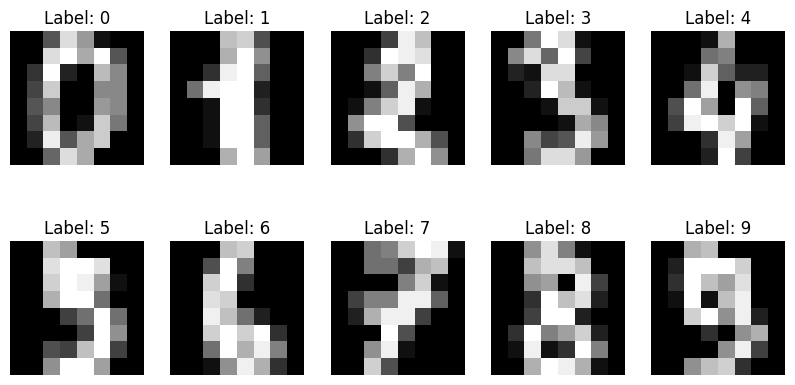

In [ ]:
# Загрузка данных
data = load_digits()
X = data.data
y = data.target

# Визуализация нескольких сэмплов
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X[i].reshape(8, 8), cmap='gray')  # Отображение изображения
    ax.set_title(f'Label: {y[i]}')  # Установка заголовка с истинным значением метки
    ax.axis('off')  # Отключение осей
plt.show()  # Показать изображения

Разделим данные на обучающую и тестовую выборки в отношении 80/20 с `random_state=42`:

In [ ]:
# Разделение данных на обучающую и тестовую выборки
...

Создадим пользовательский датасет для работы с DataLoader:

In [ ]:
# Создание пользовательского датасета
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = ...
        self.y = ...

    def __len__(self):
        return ...  # Возвращает количество элементов в датасете

    def __getitem__(self, idx):
        image = ... # Получаем картинку по его индексу (idx)
        label = ... # Получаем метку картинки по его индексу (idx)
        return image, label

# Создание пользовательского датасета
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

Создаем DataLoader-ы и определяем `collate_fn`:

In [ ]:
def collate_batch(batch):
    X_list, y_list = ...  # Разделяем батч на списки X и y
    X_batch = ...  # Объединяем список X в массив
    y_batch = ...  # Преобразуем список y в массив
    return ...  # Возвращаем тензоры


train_loader = DataLoader(
    ...,
    batch_size=...,
    shuffle=...,
    collate_fn=...
)

test_loader = DataLoader(
    ...,
    batch_size=...,
    shuffle=...,
    collate_fn=...
)

Теперь перейдем к созданию модели. Определеим в классе `SimpleNN` её архитектуру и логику:

In [ ]:
# Определение модели
class SimpleNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNN, self).__init__()
        # Первый полносвязный слой с размерностью input_size на 128
        self.fc1 = ...
        # Второй полносвязный слой c размерностью 128 на 64
        self.fc2 = ...
        # Третий полносвязный слой с размерностью 64 на output_size
        self.fc3 = ...
        # Функция активации ReLU
        self.relu = ...

    def forward(self, x):
        # Применение первого слоя и затем ReLU
        x = ...
        # Применение второго слоя и затем ReLU
        x = ...
        # Применение третьего слоя
        x = ...
        return x

Создадим модель, объект функции потерь, и объет оптимизатора:

In [ ]:
# Определение размера входных данных и выходных данных
input_size = X_train.shape[1]
output_size = len(np.unique(y_train))

# Создание модели с input_size и output_size. Перенести модель в device
model = ...

# Функция потерь CrossEntropyLoss
criterion = ...

# Оптимизатор Adam c lr=0.001
optimizer = ...

Обучим модель:

In [ ]:
# Зададим количество эпох
num_epochs = 3

# Основной цикл обучения
for epoch in range(num_epochs):

    # Установка модели в режим обучения
    ...

    for X_batch, y_batch in train_loader:

        # Переносим данные в device
        X_batch, y_batch = ...

        # Обнуление градиентов
        ...

        # Получение ответов модели
        outputs = ...

        # Вычисление потерь
        loss = ...

        # Обратное распространение ошибки
        ...

        # Обновление весов
        ...

    # Вывод потерь на текущей эпохе
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 0.4786
Epoch [2/10], Loss: 0.2040
Epoch [3/10], Loss: 0.2310
Epoch [4/10], Loss: 0.1035
Epoch [5/10], Loss: 0.0726
Epoch [6/10], Loss: 0.0400
Epoch [7/10], Loss: 0.0924
Epoch [8/10], Loss: 0.0534
Epoch [9/10], Loss: 0.0554
Epoch [10/10], Loss: 0.0226


Оценим модель с помощью `classification_report`:

In [ ]:
# Установка модели в режим оценки
model.eval()

y_true = []
y_pred = []

# Отключение вычисления градиентов
with ... :

    for X_batch, y_batch in test_loader:

        # Получение выходов модели
        outputs = ...

        # Получение предсказанных меток
        _, predicted = ...

        # Добавление истинных меток в список
        y_true.extend(y_batch.numpy())

        # Добавление предсказанных меток в список
        y_pred.extend(predicted.numpy())

# Вывод отчета о классификации
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.93      0.96      0.95        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.93      0.90      0.92        30
           9       0.97      0.97      0.97        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



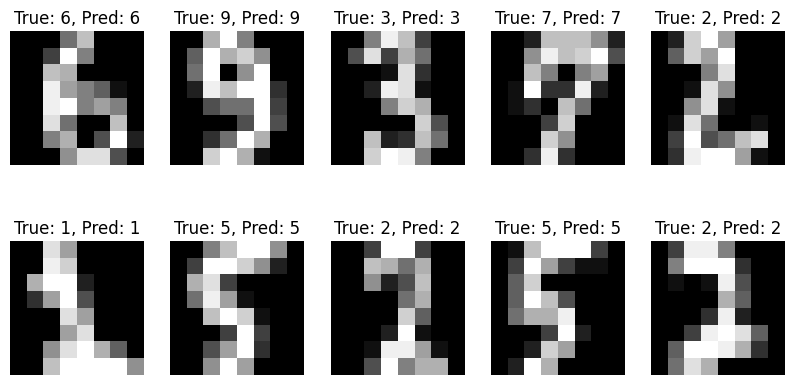

In [ ]:
# Визуализация предсказаний модели
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')  # Отображение изображения
    ax.set_title(f'True: {y_test[i]}, Pred: {y_pred[i]}')  # Установка заголовка с истинным и предсказанным значением метки
    ax.axis('off')  # Отключение осей
plt.show()  # Показать изображения

## Заключение

В ходе этого занятия мы познакомились с основами полносвязных нейронных сетей, их структурой и принципами работы. Мы узнали, что нейросети состоят из слоев нейронов, каждый из которых обрабатывает информацию и передает ее дальше. Функции активации, такие как сигмоида, гиперболический тангенс и ReLU, играют ключевую роль в моделировании нелинейных зависимостей.

Мы также рассмотрели процесс обучения нейросети, включая инициализацию параметров, прямое распространение, вычисление потерь и обратное распространение ошибки.

Преимущества нейросетей, такие как способность к обработке сложных и нелинейных зависимостей, автоматическому извлечению признаков и высокой точности на больших данных, делают их мощным инструментом в различных областях. Однако, мы также обсудили их недостатки, включая требовательность к данным и ресурсам, длительное время обучения, риск переобучения и проблему интерпретируемости.

В практической части мы создали и обучили простую полносвязную нейросеть на PyTorch для классификации текста и рукописных цифр. Мы использовали такие компоненты, как `Dataset`, `DataLoader`, `nn.Module`, и оптимизаторы для обучения модели.